# Usage

In [4]:
from floor import Floor
from bike  import Bike
import numpy as np
from solver import Euler as run
from score import score
from evol import next_gen

## Create a track and a bike list

In [5]:
ground = Floor()
bike_list = [Bike() for _ in range(100)]

## Run all bikes through the track and give them a score

In [6]:
for bike in bike_list:
    run(bike, ground)
    score(bike)
bike_list.sort(key=lambda x: x.score, reverse=True)

In [7]:
len([bk for bk in bike_list]),np.max([bk.score for bk in bike_list]),np.median([bk.score for bk in bike_list])

(100, 103.31080874378766, 13.973278488167072)

## Play a animation to visualize what is happening
Run this in the terminal preferably

In [10]:
%matplotlib inline
from animation import Render
import matplotlib.pyplot as plt
import matplotlib.animation as animation

<IPython.core.display.Javascript object>


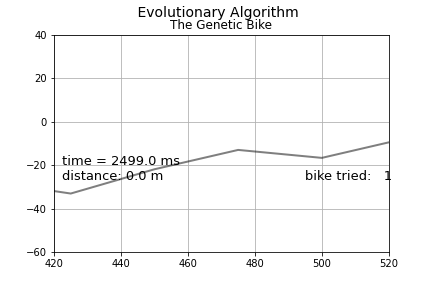

In [16]:
%matplotlib inline
%matplotlib notebook
ibike = 1
render = Render(ground, bike_list[ibike], ibike)
ani = animation.FuncAnimation(render.fig, render.animate, init_func = render.init_line, frames = render.nframes, interval = 0.0, repeat = False, blit = True)
plt.show()

## Evolve one generation (Selection -> Crossing + Mutations)

In [14]:
bike_list = next_gen(bike_list,n_crosses=50,n_mutations=50)
for bike in bike_list:
    run(bike, ground)
    score(bike)
bike_list.sort(key=lambda x: x.score, reverse=True)